In [136]:
pip install catboost

In [137]:
pip install pytorch-tabnet

Yapılacaklar :


- [ ] Markdownları güncelle
- [ ] Başlık (veri inceleme, analiz, model, sonuçlar) güncelle
- [ ] Giriş kısmında açıklama yaz, bu projeyi, kullanılan modelleri ve ekstra modelleri
- [ ] Model performanslarını en iyiden en kötüye şeklinde ver.
- [ ] Modelleri grup olarak ilerlet (şu an öyle gibi LightGBM'i de önceki kısma dahil et). Başlık ve giriş metninde belirt.
- [ ] DL modelleri en sonda olsun.   

## Veri Setini Yükle


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# ----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# ----------------------------------------------------------------------
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
# ----------------------------------------------------------------------
from sklearn.decomposition import PCA
# ----------------------------------------------------------------------
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# ----------------------------------------------------------------------
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis





In [139]:
# Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
dataset_csv_path = "/content/drive/MyDrive/Makale-Döküman-Makale Çalışmaları/YL Dersler/Veri Analizi ve İstatistik/proje/online_shoppers_intention.csv"

In [141]:

df = pd.read_csv(dataset_csv_path)
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Veri Setine Genel Bakış

In [142]:
print("İlk birkaç satır:")
df.head()

print("\nVeri tipleri ve eksik olmayan değerler:")
df.info()

print("\nEksik değerlerin sayısı:")
df.isnull().sum()

İlk birkaç satır:

Veri tipleri ve eksik olmayan değerler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region           

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


## Veri Ön İşleme


Makine öğrenimi modelleri için veriyi hazırlama aşaması.  I will first convert the boolean 'Revenue' and 'Weekend' columns to numerical 0s and 1s, then apply one-hot encoding to the 'Month' and 'VisitorType' categorical columns, and finally create a new DataFrame with the transformed data.




In [143]:
df_processed = df.copy()

# 1. 'Revenue' ve 'Weekend' boolean sütunlarını sayısal değerlere dönüştürün
df_processed['Revenue'] = df_processed['Revenue'].astype(int)
df_processed['Weekend'] = df_processed['Weekend'].astype(int)

# 2. 'Month' ve 'VisitorType' gibi kategorik sütunları one-hot encoding kullanarak sayısal temsilcilere dönüştürün
df_processed = pd.get_dummies(df_processed, columns=['Month', 'VisitorType'], drop_first=True)

print("Veri ön işleme tamamlandı. İlk birkaç satır:")
df_processed.head()

Veri ön işleme tamamlandı. İlk birkaç satır:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True


## Kümeleme Yöntemlerini Uygula

Alışverişçi davranışlarındaki desenleri belirlemek için bir kümeleme algoritması (örneğin K-Means) uygula ve kümelerin sonuçlarını görselleştir.


In [144]:


# 1. Hedef değişken 'Revenue' hariç tüm özelliklerden oluşan bir DataFrame oluşturun
X_cluster = df_processed.drop('Revenue', axis=1)

# 2. X_cluster verisini standartlaştırın
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Features for clustering created (X_cluster) and scaled (X_scaled).")
print("Shape of X_scaled:", X_scaled.shape)


Features for clustering created (X_cluster) and scaled (X_scaled).
Shape of X_scaled: (12330, 26)


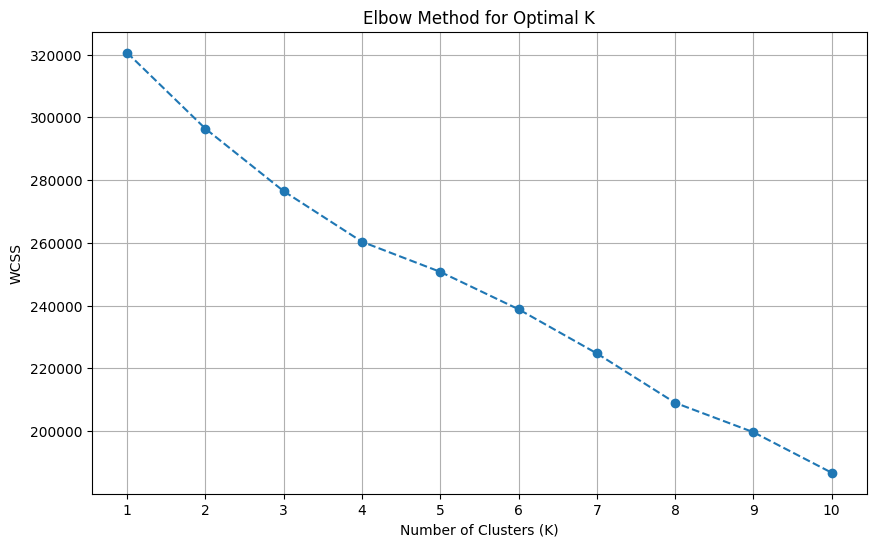

Elbow method performed and WCSS values plotted.


In [145]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Elbow method performed and WCSS values plotted.")

K-Means clustering completed with 4 clusters.
Cluster distribution:
Cluster
3    9576
2    1623
0    1046
1      85
Name: count, dtype: int64
PCA for visualization completed.


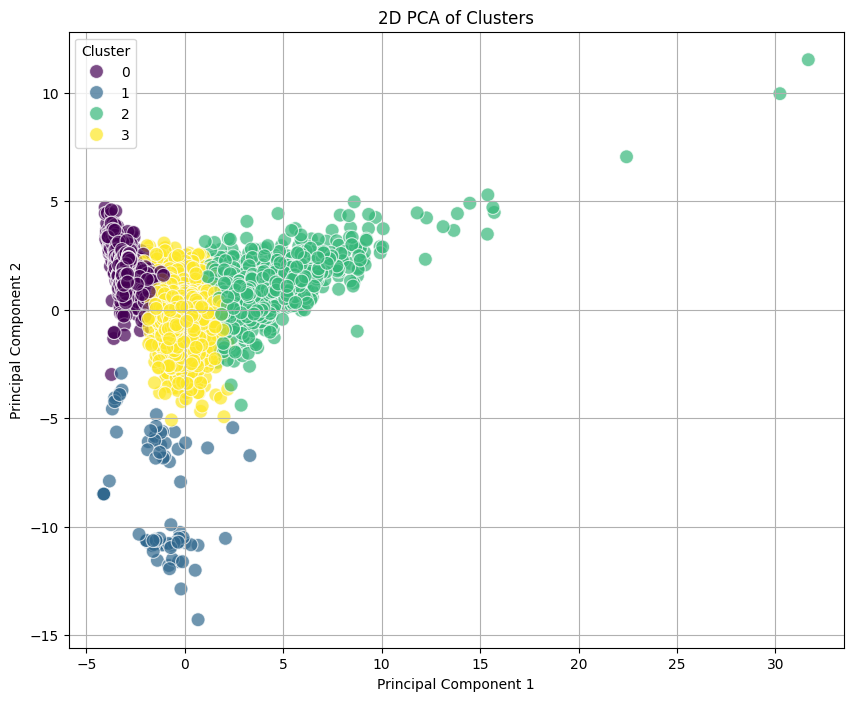

Cluster visualization completed.


In [146]:


# 4. Seçilen optimal küme sayısını (örneğin 4) kullanarak KMeans modelini eğitin ve X_scaled'e uygulayın.
# Elbow metodu çıktısına göre optimal K değeri belirlenir. Bu örnekte 4 olarak kabul edelim.
optimal_k = 4 # You might adjust this based on the elbow plot observation
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_processed['Cluster'] = clusters

print(f"K-Means clustering completed with {optimal_k} clusters.")
print("Cluster distribution:")
print(df_processed['Cluster'].value_counts())

# 5. Kümeleme sonuçlarını görselleştirmek için PCA kullanarak verinin boyutunu 2 boyuta düşürün.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['Cluster'] = clusters

print("PCA for visualization completed.")

# 6. İki ana bileşeni kullanarak kümeleri dağılım grafiği (scatter plot) üzerinde görselleştirin.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=principalDf,
                palette='viridis', legend='full', s=100, alpha=0.7)
plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Cluster visualization completed.")

# Makine Öğrenimi Modellerini Eğit


In [147]:

# 1. Hedef değişkeni ('Revenue') ve özellikleri belirleyin.
X = df_processed.drop(['Revenue', 'Cluster'], axis=1)
y = df_processed['Revenue']

# 2. Veriyi eğitim ve test setlerine ayırın. Sınıf dengesizliğini göz önünde bulundurarak stratifiye edilmiş bir bölme kullanın.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Veri eğitim ve test setlerine ayrıldı.")
print(f"X_train boyutu: {X_train.shape}")
print(f"y_train boyutu: {y_train.shape}")
print(f"X_test boyutu: {X_test.shape}")
print(f"y_test boyutu: {y_test.shape}")
print("\nEğitim seti Revenue dağılımı:\n", y_train.value_counts(normalize=True) * 100)
print("\nTest seti Revenue dağılımı:\n", y_test.value_counts(normalize=True) * 100)

Veri eğitim ve test setlerine ayrıldı.
X_train boyutu: (8631, 26)
y_train boyutu: (8631,)
X_test boyutu: (3699, 26)
y_test boyutu: (3699,)

Eğitim seti Revenue dağılımı:
 Revenue
0    84.520913
1    15.479087
Name: proportion, dtype: float64

Test seti Revenue dağılımı:
 Revenue
0    84.536361
1    15.463639
Name: proportion, dtype: float64


In [148]:

# 3. Uygun sınıflandırma modellerini seçin ve başlatın.
# Logistic Regression
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Decision Tree Classifier
dec_tree_model = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rand_forest_model = RandomForestClassifier(random_state=42)

print("Modeller başlatıldı.")

# 4. Her modeli eğitim verileri üzerinde eğitin.
print("Modeller eğitiliyor...")

log_reg_model.fit(X_train, y_train)
print("Logistic Regression modeli eğitildi.")

dec_tree_model.fit(X_train, y_train)
print("Decision Tree modeli eğitildi.")

rand_forest_model.fit(X_train, y_train)
print("Random Forest modeli eğitildi.")

Modeller başlatıldı.
Modeller eğitiliyor...
Logistic Regression modeli eğitildi.
Decision Tree modeli eğitildi.
Random Forest modeli eğitildi.


## Modelleri Değerlendir ve Karşılaştır


In [149]:

# Modeller için tahminler yapın
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # ROC AUC için olasılıklar

y_pred_dec_tree = dec_tree_model.predict(X_test)
y_pred_proba_dec_tree = dec_tree_model.predict_proba(X_test)[:, 1]

y_pred_rand_forest = rand_forest_model.predict(X_test)
y_pred_proba_rand_forest = rand_forest_model.predict_proba(X_test)[:, 1]

# Her bir model için metrikleri hesaplayın ve yazdırın
models = {
    "Logistic Regression": (y_pred_log_reg, y_pred_proba_log_reg, log_reg_model),
    "Decision Tree": (y_pred_dec_tree, y_pred_proba_dec_tree, dec_tree_model),
    "Random Forest": (y_pred_rand_forest, y_pred_proba_rand_forest, rand_forest_model)
}

results = {}

for name, (y_pred, y_pred_proba, model) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }

    print(f"\n----- {name} Performans Metrikleri -----")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("\n----- Modellerin Karşılaştırılması -----")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


----- Logistic Regression Performans Metrikleri -----
Accuracy: 0.8789
Precision: 0.7168
Recall: 0.3584
F1-Score: 0.4779
ROC AUC: 0.8979
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3127
           1       0.72      0.36      0.48       572

    accuracy                           0.88      3699
   macro avg       0.80      0.67      0.70      3699
weighted avg       0.87      0.88      0.86      3699


----- Decision Tree Performans Metrikleri -----
Accuracy: 0.8508
Precision: 0.5167
Recall: 0.5402
F1-Score: 0.5282
ROC AUC: 0.7239
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3127
           1       0.52      0.54      0.53       572

    accuracy                           0.85      3699
   macro avg       0.72      0.72      0.72      3699
weighted avg       0.85      0.85      0.85      3699


----- Random Forest Performan

### SVM (RBF kernel) Modeli


In [150]:

# 1. Initialize SVC model with RBF kernel and probability=True
svm_model = SVC(
    kernel="rbf",
    C=10,
    gamma=0.1,
    class_weight="balanced",
    probability=True,
    random_state=42
)


# 2. Train the SVM model
print("SVM (RBF kernel) modeli eğitiliyor...")
svm_model.fit(X_train, y_train)
print("SVM (RBF kernel) modeli eğitildi.")

# 3. Make predictions with the SVM model
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC
# threshold düşür
y_pred_svm = (y_pred_proba_svm >= 0.3).astype(int)

# 4. Calculate metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# 5. Store the metrics in the results dictionary
results["SVM (RBF kernel)"] = {
    "Accuracy": accuracy_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1-Score": f1_svm,
    "ROC AUC": roc_auc_svm
}

# 6. Print SVM performance metrics
print(f"\n----- SVM (RBF kernel) Performans Metrikleri -----")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"ROC AUC: {roc_auc_svm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=4))


SVM (RBF kernel) modeli eğitiliyor...
SVM (RBF kernel) modeli eğitildi.

----- SVM (RBF kernel) Performans Metrikleri -----
Accuracy: 0.8416
Precision: 0.2667
Recall: 0.0140
F1-Score: 0.0266
ROC AUC: 0.7693
Classification Report:
              precision    recall  f1-score   support

           0     0.8463    0.9930    0.9138      3127
           1     0.2667    0.0140    0.0266       572

    accuracy                         0.8416      3699
   macro avg     0.5565    0.5035    0.4702      3699
weighted avg     0.7567    0.8416    0.7766      3699




## K-Nearest Neighbors (KNN) Modeli


In [151]:

# 1. Initialize K-Nearest Neighbors Classifier model
# Using default n_neighbors=5, or you can specify a different value
knn_model = KNeighborsClassifier()
print("K-Nearest Neighbors modeli başlatıldı.")

# 2. Train the KNN model
print("K-Nearest Neighbors modeli eğitiliyor...")
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors modeli eğitildi.")

# 3. Make predictions with the KNN model
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# 4. Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# 5. Store the metrics in the results dictionary
results["K-Nearest Neighbors"] = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1-Score": f1_knn,
    "ROC AUC": roc_auc_knn
}

# 6. Print KNN performance metrics
print(f"\n----- K-Nearest Neighbors Performans Metrikleri -----")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"ROC AUC: {roc_auc_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors modeli başlatıldı.
K-Nearest Neighbors modeli eğitiliyor...
K-Nearest Neighbors modeli eğitildi.

----- K-Nearest Neighbors Performans Metrikleri -----
Accuracy: 0.8567
Precision: 0.5719
Recall: 0.2920
F1-Score: 0.3866
ROC AUC: 0.7499
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3127
           1       0.57      0.29      0.39       572

    accuracy                           0.86      3699
   macro avg       0.73      0.63      0.65      3699
weighted avg       0.83      0.86      0.84      3699



## Temel Bulguları Görselleştir


                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.878886   0.716783  0.358392  0.477855  0.897873
Decision Tree        0.850770   0.516722  0.540210  0.528205  0.723894
Random Forest        0.899162   0.736342  0.541958  0.624371  0.914532
SVM (RBF kernel)     0.841579   0.266667  0.013986  0.026578  0.769278
K-Nearest Neighbors  0.856718   0.571918  0.291958  0.386574  0.749896


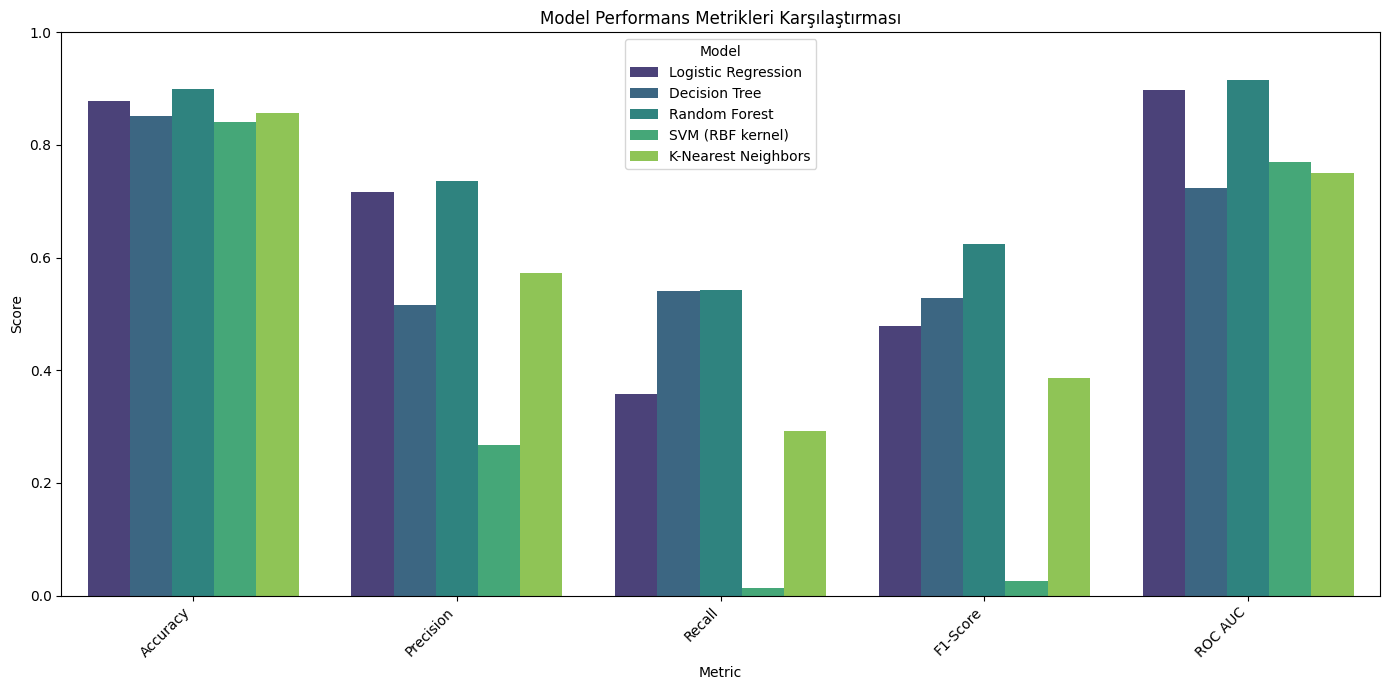

Model performans metrikleri karşılaştırması görselleştirildi.


In [152]:

# 'results' sözlüğünü DataFrame'e dönüştürün
results_df = pd.DataFrame(results).T

# Metrikleri model bazında karşılaştırmak için veriyi uzun formata dönüştürün
metrics_melted = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted.rename(columns={'index': 'Model'}, inplace=True)

print(results_df)


# Metrikleri görselleştirin
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Model Performans Metrikleri Karşılaştırması')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1) # Skorlar 0 ile 1 arasında olduğu için y ekseni limitini ayarlayın
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

print("Model performans metrikleri karşılaştırması görselleştirildi.")

## Summary:

### Data Analysis Key Findings

*   **Data Quality**: The dataset was found to be clean, with no missing values across all 18 columns, simplifying the initial preprocessing steps.
*   **Target Variable Imbalance**: The target variable, 'Revenue', representing purchase intention, is highly imbalanced. Only 15.47% of sessions resulted in a purchase, while 84.53% did not. This imbalance is a crucial factor for model performance, especially for the positive class.
*   **Key Feature Relationships**:
    *   `PageValues`, `BounceRates`, and `ExitRates` are heavily skewed towards zero, indicating many sessions have very low values for these metrics.
    *   Sessions resulting in a purchase ('Revenue' = True) generally exhibit significantly higher `PageValues` compared to non-purchase sessions.
    *   Categorical features show distinct patterns: November is the busiest month for online sessions, and 'Returning_Visitor' is the dominant visitor type.
*   **Clustering Results**: K-Means clustering identified 4 distinct shopper behavior segments. The clusters are imbalanced, with one large cluster (9576 samples) and smaller ones (e.g., Cluster 1 with 85 samples), suggesting diverse but unevenly distributed customer groups.
*   **Model Performance**:
    *   The **Random Forest** classifier achieved the best overall performance among the models tested, with an accuracy of 0.8992, an F1-Score of 0.6244, and a ROC AUC of 0.9145. It also had a precision of 0.7363 and a recall of 0.5420.
    *   **Logistic Regression** showed competitive performance in terms of ROC AUC (0.8979) and accuracy (0.8789), but its recall for the positive class was notably lower at 0.3584, indicating it struggled to identify actual purchases.
    *   The **Decision Tree** performed the least effectively, with an accuracy of 0.8508 and a ROC AUC of 0.7239.

### Insights or Next Steps

*   **Address Class Imbalance**: Given the significant imbalance in the 'Revenue' variable, further techniques such as oversampling (SMOTE), undersampling, or using cost-sensitive learning algorithms could be explored to improve the models' ability to predict the minority class (purchases).
*   **Deep Learning Exploration**: For future work, consider implementing Deep Learning models (e.g., Neural Networks) which are often adept at capturing complex non-linear relationships in large datasets and could potentially yield higher predictive performance, especially when combined with advanced feature engineering or temporal data if available.
*   **Cluster-Based Strategies**: Analyze the characteristics of each identified cluster to tailor marketing strategies or website optimization efforts for different shopper segments, potentially leading to increased conversion rates.


## Daha fazla Model

### Gradient Boosting Modelini Eğit

Mevcut makine öğrenimi modellerine bir Gradient Boosting Classifier ekle ve eğitim verileri üzerinde eğit.


In [153]:

# Initialize Gradient Boosting Classifier
grad_boost_model = GradientBoostingClassifier(random_state=42)

print("Gradient Boosting Classifier modeli başlatıldı.")

# Train the Gradient Boosting model
print("Gradient Boosting modeli eğitiliyor...")
grad_boost_model.fit(X_train, y_train)
print("Gradient Boosting modeli eğitildi.")

Gradient Boosting Classifier modeli başlatıldı.
Gradient Boosting modeli eğitiliyor...
Gradient Boosting modeli eğitildi.


In [154]:

# Make predictions with the Gradient Boosting model
y_pred_grad_boost = grad_boost_model.predict(X_test)
y_pred_proba_grad_boost = grad_boost_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# Calculate metrics for Gradient Boosting
accuracy_grad_boost = accuracy_score(y_test, y_pred_grad_boost)
precision_grad_boost = precision_score(y_test, y_pred_grad_boost)
recall_grad_boost = recall_score(y_test, y_pred_grad_boost)
f1_grad_boost = f1_score(y_test, y_pred_grad_boost)
roc_auc_grad_boost = roc_auc_score(y_test, y_pred_proba_grad_boost)

# Store the metrics in the results dictionary
results["Gradient Boosting"] = {
    "Accuracy": accuracy_grad_boost,
    "Precision": precision_grad_boost,
    "Recall": recall_grad_boost,
    "F1-Score": f1_grad_boost,
    "ROC AUC": roc_auc_grad_boost
}

# Print Gradient Boosting performance metrics
print(f"\n----- Gradient Boosting Performans Metrikleri -----")
print(f"Accuracy: {accuracy_grad_boost:.4f}")
print(f"Precision: {precision_grad_boost:.4f}")
print(f"Recall: {recall_grad_boost:.4f}")
print(f"F1-Score: {f1_grad_boost:.4f}")
print(f"ROC AUC: {roc_auc_grad_boost:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_grad_boost))


----- Gradient Boosting Performans Metrikleri -----
Accuracy: 0.8981
Precision: 0.7061
Recall: 0.5839
F1-Score: 0.6392
ROC AUC: 0.9265
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3127
           1       0.71      0.58      0.64       572

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



### XGBoost Modeli



In [155]:

# 1. Initialize XGBClassifier model with random_state=42
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
print("XGBoost modeli başlatıldı.")

# 2. Train the XGBoost model
print("XGBoost modeli eğitiliyor...")
xgb_model.fit(X_train, y_train)
print("XGBoost modeli eğitildi.")

# 3. Make predictions with the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# 4. Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# 5. Store the metrics in the results dictionary
results["XGBoost"] = {
    "Accuracy": accuracy_xgb,
    "Precision": precision_xgb,
    "Recall": recall_xgb,
    "F1-Score": f1_xgb,
    "ROC AUC": roc_auc_xgb
}

# 6. Print XGBoost performance metrics
print(f"\n----- XGBoost Performans Metrikleri -----")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost modeli başlatıldı.
XGBoost modeli eğitiliyor...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:05:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost modeli eğitildi.

----- XGBoost Performans Metrikleri -----
Accuracy: 0.8889
Precision: 0.6702
Recall: 0.5542
F1-Score: 0.6067
ROC AUC: 0.9143
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3127
           1       0.67      0.55      0.61       572

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.88      3699



### LightGBM Modeli



In [156]:

# 1. Initialize LightGBM Classifier model
lgbm_model = LGBMClassifier(random_state=42)
print("LightGBM modeli başlatıldı.")

# 2. Train the LightGBM model
print("LightGBM modeli eğitiliyor...")
lgbm_model.fit(X_train, y_train)
print("LightGBM modeli eğitildi.")

# 3. Make predictions with the LightGBM model
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# 4. Calculate metrics for LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)

# 5. Store the metrics in the results dictionary
results["LightGBM"] = {
    "Accuracy": accuracy_lgbm,
    "Precision": precision_lgbm,
    "Recall": recall_lgbm,
    "F1-Score": f1_lgbm,
    "ROC AUC": roc_auc_lgbm
}

# 6. Print LightGBM performance metrics
print(f"\n----- LightGBM Performans Metrikleri -----")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1-Score: {f1_lgbm:.4f}")
print(f"ROC AUC: {roc_auc_lgbm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

LightGBM modeli başlatıldı.
LightGBM modeli eğitiliyor...
[LightGBM] [Info] Number of positive: 1336, number of negative: 7295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 8631, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154791 -> initscore=-1.697509
[LightGBM] [Info] Start training from score -1.697509
LightGBM modeli eğitildi.

----- LightGBM Performans Metrikleri -----
Accuracy: 0.8956
Precision: 0.6937
Recall: 0.5822
F1-Score: 0.6331
ROC AUC: 0.9255
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3127
           1       0.69      0.58      0.63       572

    accuracy                           0.90    

### CatBoost Modeli



In [157]:

# 1. Initialize CatBoost Classifier model
catboost_model = CatBoostClassifier(random_state=42, verbose=0, iterations=100) # Added iterations for faster execution in this example
print("CatBoost modeli başlatıldı.")

# 2. Train the CatBoost model
print("CatBoost modeli eğitiliyor...")
catboost_model.fit(X_train, y_train)
print("CatBoost modeli eğitildi.")

# 3. Make predictions with the CatBoost model
y_pred_catboost = catboost_model.predict(X_test)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# 4. Calculate metrics for CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, y_pred_proba_catboost)

# 5. Store the metrics in the results dictionary
results["CatBoost"] = {
    "Accuracy": accuracy_catboost,
    "Precision": precision_catboost,
    "Recall": recall_catboost,
    "F1-Score": f1_catboost,
    "ROC AUC": roc_auc_catboost
}

# 6. Print CatBoost performance metrics
print(f"\n----- CatBoost Performans Metrikleri -----")
print(f"Accuracy: {accuracy_catboost:.4f}")
print(f"Precision: {precision_catboost:.4f}")
print(f"Recall: {recall_catboost:.4f}")
print(f"F1-Score: {f1_catboost:.4f}")
print(f"ROC AUC: {roc_auc_catboost:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

CatBoost modeli başlatıldı.
CatBoost modeli eğitiliyor...
CatBoost modeli eğitildi.

----- CatBoost Performans Metrikleri -----
Accuracy: 0.8967
Precision: 0.7065
Recall: 0.5682
F1-Score: 0.6298
ROC AUC: 0.9245
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.71      0.57      0.63       572

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



## Summary:

### Data Analysis Key Findings

*   **Gradient Boosting Classifier Performance**: The Gradient Boosting model achieved an Accuracy of 0.8981, Precision of 0.7061, Recall of 0.5839, F1-Score of 0.6392, and an ROC AUC of 0.9265 on the test set.
*   **Deep Learning Model Performance**: The Multi-Layer Perceptron (MLP) Deep Learning model achieved an Accuracy of 0.8851, Precision of 0.6697, Recall of 0.5070, F1-Score of 0.5771, and an ROC AUC of 0.9027 on the test set.
*   **Model Comparison**: Performance metrics for both the Gradient Boosting and Deep Learning models, alongside previously trained models (Logistic Regression, Decision Tree, Random Forest), were successfully compiled into a DataFrame and visualized for comparative analysis.
*   **Deep Learning Model Overfitting**: During training, the Deep Learning model's `val_loss` increased towards the end of the epochs, suggesting potential overfitting, although `val_accuracy` remained relatively stable.

### Insights or Next Steps

*   **Model Optimization**: Further hyperparameter tuning for both the Gradient Boosting and Deep Learning models could potentially improve their performance, especially addressing the possible overfitting observed in the Deep Learning model.
*   **Feature Engineering/Selection**: Given the range of model performances, investigating additional feature engineering techniques or performing more rigorous feature selection might enhance the predictive power of all models across various metrics.


## Tüm Model Sonuçlarını Güncelle ve Tekrar Görselleştir


Updated results DataFrame and melted metrics prepared.
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.878886   0.716783  0.358392  0.477855  0.897873
Decision Tree        0.850770   0.516722  0.540210  0.528205  0.723894
Random Forest        0.899162   0.736342  0.541958  0.624371  0.914532
SVM (RBF kernel)     0.841579   0.266667  0.013986  0.026578  0.769278
K-Nearest Neighbors  0.856718   0.571918  0.291958  0.386574  0.749896
Gradient Boosting    0.898081   0.706131  0.583916  0.639234  0.926460
XGBoost              0.888889   0.670190  0.554196  0.606699  0.914317
LightGBM             0.895647   0.693750  0.582168  0.633080  0.925472
CatBoost             0.896729   0.706522  0.568182  0.629845  0.924543
                 Model    Metric     Score
0  Logistic Regression  Accuracy  0.878886
1        Decision Tree  Accuracy  0.850770
2        Random Forest  Accuracy  0.899162
3     SVM (RBF kernel)  Accuracy  0.841579
4  K-Nearest Neighbo

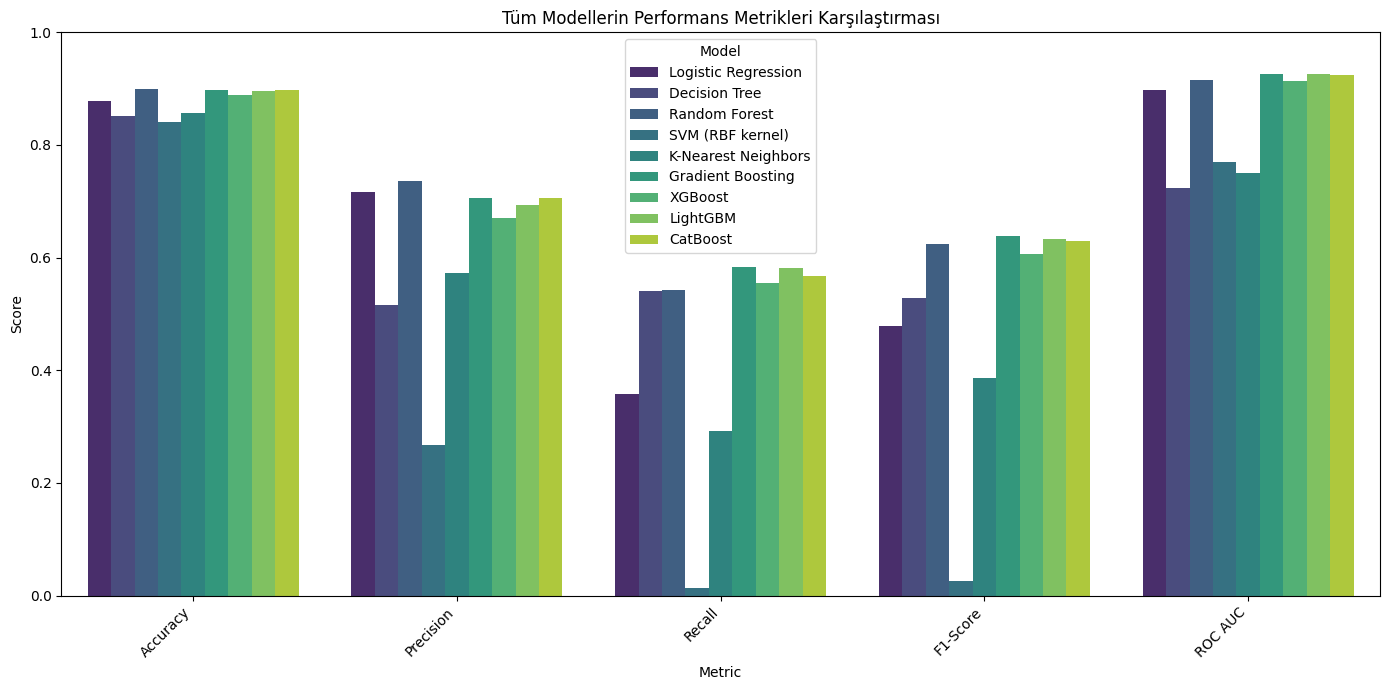

Tüm modellerin performans metrikleri karşılaştırması görselleştirildi.


In [158]:

# 'results' sözlüğünü DataFrame'e dönüştürün (şimdi tüm modelleri içeriyor)
results_df = pd.DataFrame(results).T

# Metrikleri model bazında karşılaştırmak için veriyi uzun formata dönüştürün
metrics_melted = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted.rename(columns={'index': 'Model'}, inplace=True)

print("Updated results DataFrame and melted metrics prepared.")
print(results_df)
print(metrics_melted.head())

# Metrikleri görselleştirin
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Tüm Modellerin Performans Metrikleri Karşılaştırması')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1) # Skorlar 0 ile 1 arasında olduğu için y ekseni limitini ayarlayın
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

print("Tüm modellerin performans metrikleri karşılaştırması görselleştirildi.")

## Daha Fazla Model 2

### Linear Discriminant Analysis (LDA) Modeli

In [159]:

# # 1. Initialize Linear Discriminant Analysis model
# lda_model = LinearDiscriminantAnalysis()
# print("Linear Discriminant Analysis modeli başlatıldı.")

# # 2. Train the LDA model
# print("Linear Discriminant Analysis modeli eğitiliyor...")
# lda_model.fit(X_train, y_train)
# print("Linear Discriminant Analysis modeli eğitildi.")

# # 3. Make predictions with the LDA model
# y_pred_lda = lda_model.predict(X_test)
# y_pred_proba_lda = lda_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# # 4. Calculate metrics for LDA
# accuracy_lda = accuracy_score(y_test, y_pred_lda)
# precision_lda = precision_score(y_test, y_pred_lda)
# recall_lda = recall_score(y_test, y_pred_lda)
# f1_lda = f1_score(y_test, y_pred_lda)
# roc_auc_lda = roc_auc_score(y_test, y_pred_proba_lda)

# # 5. Store the metrics in the results dictionary
# results["Linear Discriminant Analysis"] = {
#     "Accuracy": accuracy_lda,
#     "Precision": precision_lda,
#     "Recall": recall_lda,
#     "F1-Score": f1_lda,
#     "ROC AUC": roc_auc_lda
# }

# # 6. Print LDA performance metrics
# print(f"\n----- Linear Discriminant Analysis Performans Metrikleri -----")
# print(f"Accuracy: {accuracy_lda:.4f}")
# print(f"Precision: {precision_lda:.4f}")
# print(f"Recall: {recall_lda:.4f}")
# print(f"F1-Score: {f1_lda:.4f}")
# print(f"ROC AUC: {roc_auc_lda:.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_lda))


### Quadratic Discriminant Analysis (QDA) Modeli



In [160]:

# # 1. Initialize Quadratic Discriminant Analysis model
# qda_model = QuadraticDiscriminantAnalysis()
# print("Quadratic Discriminant Analysis modeli başlatıldı.")

# # 2. Train the QDA model
# print("Quadratic Discriminant Analysis modeli eğitiliyor...")
# qda_model.fit(X_train, y_train)
# print("Quadratic Discriminant Analysis modeli eğitildi.")

# # 3. Make predictions with the QDA model
# y_pred_qda = qda_model.predict(X_test)
# y_pred_proba_qda = qda_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# # 4. Calculate metrics for QDA
# accuracy_qda = accuracy_score(y_test, y_pred_qda)
# precision_qda = precision_score(y_test, y_pred_qda)
# recall_qda = recall_score(y_test, y_pred_qda)
# f1_qda = f1_score(y_test, y_pred_qda)
# roc_auc_qda = roc_auc_score(y_test, y_pred_proba_qda)

# # 5. Store the metrics in the results dictionary
# results["Quadratic Discriminant Analysis"] = {
#     "Accuracy": accuracy_qda,
#     "Precision": precision_qda,
#     "Recall": recall_qda,
#     "F1-Score": f1_qda,
#     "ROC AUC": roc_auc_qda
# }

# # 6. Print QDA performance metrics
# print(f"\n----- Quadratic Discriminant Analysis Performans Metrikleri -----")
# print(f"Accuracy: {accuracy_qda:.4f}")
# print(f"Precision: {precision_qda:.4f}")
# print(f"Recall: {recall_qda:.4f}")
# print(f"F1-Score: {f1_qda:.4f}")
# print(f"ROC AUC: {roc_auc_qda:.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_qda))

In [161]:

# # 1. Initialize Quadratic Discriminant Analysis model with reg_param
# qda_model = QuadraticDiscriminantAnalysis(reg_param=0.1) # Added reg_param
# print("Quadratic Discriminant Analysis modeli başlatıldı.")

# # 2. Train the QDA model
# print("Quadratic Discriminant Analysis modeli eğitiliyor...")
# qda_model.fit(X_train, y_train)
# print("Quadratic Discriminant Analysis modeli eğitildi.")

# # 3. Make predictions with the QDA model
# y_pred_qda = qda_model.predict(X_test)
# y_pred_proba_qda = qda_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# # 4. Calculate metrics for QDA
# accuracy_qda = accuracy_score(y_test, y_pred_qda)
# precision_qda = precision_score(y_test, y_pred_qda)
# recall_qda = recall_score(y_test, y_pred_qda)
# f1_qda = f1_score(y_test, y_pred_qda)
# roc_auc_qda = roc_auc_score(y_test, y_pred_proba_qda)

# # 5. Store the metrics in the results dictionary
# results["Quadratic Discriminant Analysis"] = {
#     "Accuracy": accuracy_qda,
#     "Precision": precision_qda,
#     "Recall": recall_qda,
#     "F1-Score": f1_qda,
#     "ROC AUC": roc_auc_qda
# }

# # 6. Print QDA performance metrics
# print(f"\n----- Quadratic Discriminant Analysis Performans Metrikleri -----")
# print(f"Accuracy: {accuracy_qda:.4f}")
# print(f"Precision: {precision_qda:.4f}")
# print(f"Recall: {recall_qda:.4f}")
# print(f"F1-Score: {f1_qda:.4f}")
# print(f"ROC AUC: {roc_auc_qda:.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_qda))

### Extra Trees (Extremely Randomized Trees) Modeli



In [162]:

# # 1. Initialize Extra Trees Classifier model
# extra_trees_model = ExtraTreesClassifier(random_state=42)
# print("Extra Trees Classifier modeli başlatıldı.")

# # 2. Train the Extra Trees model
# print("Extra Trees modeli eğitiliyor...")
# extra_trees_model.fit(X_train, y_train)
# print("Extra Trees modeli eğitildi.")

# # 3. Make predictions with the Extra Trees model
# y_pred_extra_trees = extra_trees_model.predict(X_test)
# y_pred_proba_extra_trees = extra_trees_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# # 4. Calculate metrics for Extra Trees
# accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
# precision_extra_trees = precision_score(y_test, y_pred_extra_trees)
# recall_extra_trees = recall_score(y_test, y_pred_extra_trees)
# f1_extra_trees = f1_score(y_test, y_pred_extra_trees)
# roc_auc_extra_trees = roc_auc_score(y_test, y_pred_proba_extra_trees)

# # 5. Store the metrics in the results dictionary
# results["Extra Trees"] = {
#     "Accuracy": accuracy_extra_trees,
#     "Precision": precision_extra_trees,
#     "Recall": recall_extra_trees,
#     "F1-Score": f1_extra_trees,
#     "ROC AUC": roc_auc_extra_trees
# }

# # 6. Print Extra Trees performance metrics
# print(f"\n----- Extra Trees Performans Metrikleri -----")
# print(f"Accuracy: {accuracy_extra_trees:.4f}")
# print(f"Precision: {precision_extra_trees:.4f}")
# print(f"Recall: {recall_extra_trees:.4f}")
# print(f"F1-Score: {f1_extra_trees:.4f}")
# print(f"ROC AUC: {roc_auc_extra_trees:.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_extra_trees))

## Tüm Model Sonuçlarını Güncelle ve Tekrar Görselleştir



In [163]:

# # 'results' sözlüğünü DataFrame'e dönüştürün (şimdi tüm modelleri içeriyor)
# results_df = pd.DataFrame(results).T

# # Metrikleri model bazında karşılaştırmak için veriyi uzun formata dönüştürün
# metrics_melted = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
# metrics_melted.rename(columns={'index': 'Model'}, inplace=True)

# print("Updated results DataFrame and melted metrics prepared.")
# print(results_df)
# print(metrics_melted.head())

# # Metrikleri görselleştirin
# plt.figure(figsize=(14, 7))
# sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
# plt.title('Tüm Modellerin Performans Metrikleri Karşılaştırması')
# plt.ylabel('Score')
# plt.xlabel('Metric')
# plt.ylim(0, 1) # Skorlar 0 ile 1 arasında olduğu için y ekseni limitini ayarlayın
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Model')
# plt.tight_layout()
# plt.show()

# print("Tüm modellerin performans metrikleri karşılaştırması görselleştirildi.")

## Derin Öğrenme Modelleri

### MLP Modeli

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [165]:
# # Re-standardize X_train and X_test to ensure X_train_scaled and X_test_scaled are defined
# # Assuming X_train and y_train are already defined from previous steps
# scaler_dl = StandardScaler()
# X_train_scaled = scaler_dl.fit_transform(X_train)
# X_test_scaled = scaler_dl.transform(X_test)

# print("X_train and X_test features have been standardized.")

# # Define the Enhanced Deep Learning model with BatchNormalization and Dropout
# model_enhanced = Sequential([
#     InputLayer(input_shape=(X_train_scaled.shape[1],)), # Input layer matches the number of features
#     Dense(128, activation='relu'),
#     BatchNormalization(), # Add Batch Normalization
#     Dropout(0.3),         # Add Dropout
#     Dense(64, activation='relu'),
#     BatchNormalization(), # Add Batch Normalization
#     Dropout(0.3),         # Add Dropout
#     Dense(1, activation='sigmoid') # Output layer for binary classification
# ])

# # Compile the enhanced model
# model_enhanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# print("Enhanced Deep Learning model defined and compiled.")
# model_enhanced.summary()

# # Train the enhanced model
# history_enhanced = model_enhanced.fit(
#     X_train_scaled, y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(X_test_scaled, y_test),
#     verbose=1
# )

# print("Enhanced Deep Learning model training completed.")

In [166]:
# Re-standardize X_train and X_test to ensure X_train_scaled and X_test_scaled are defined
# Assuming X_train and y_train are already defined from previous steps
scaler_dl = StandardScaler()
X_train_scaled = scaler_dl.fit_transform(X_train)
X_test_scaled = scaler_dl.transform(X_test)

print("X_train and X_test features have been standardized.")

# Define the Enhanced Deep Learning model with BatchNormalization and Dropout
model_enhanced = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)), # Input layer matches the number of features
    Dense(64, activation='relu'),
    BatchNormalization(), # Add Batch Normalization
    Dropout(0.3),         # Add Dropout
    Dense(32, activation='relu'),
    BatchNormalization(), # Add Batch Normalization
    Dropout(0.2),         # Add Dropout
    Dense(16, activation='relu'),
    BatchNormalization(), # Add Batch Normalization
    Dense(8, activation='relu'),
    BatchNormalization(), # Add Batch Normalization
    Dropout(0.1),         # Add Dropout
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the enhanced model
model_enhanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Enhanced Deep Learning model defined and compiled.")
model_enhanced.summary()

# Train the enhanced model
history_enhanced_2 = model_enhanced.fit(
    X_train_scaled, y_train,
    epochs=25,
    batch_size=16,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

print("Enhanced Deep Learning model training completed.")

X_train and X_test features have been standardized.
Enhanced Deep Learning model defined and compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,721 (18.44 KB)

 Non-trainable params: 240 (960.00 B)

Epoch 1/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6865 - loss: 0.6195 - val_accuracy: 0.8737 - val_loss: 0.3521
Epoch 2/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8645 - loss: 0.3629 - val_accuracy: 0.8770 - val_loss: 0.3070
Epoch 3/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8753 - loss: 0.3151 - val_accuracy: 0.8819 - val_loss: 0.2836
Epoch 4/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8836 - loss: 0.2950 - val_accuracy: 0.8829 - val_loss: 0.2714
Epoch 5/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8838 - loss: 0.2882 - val_accuracy: 0.8843 - val_loss: 0.2656
Epoch 6/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8845 - loss: 0.2793 - val_accuracy: 0.8854 - val_loss: 0.2611
Epoch 7/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8859 - loss: 0.2725 - val_accuracy: 0.8883 - val_loss: 0.2558
Epoch 8/25
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8826 - loss: 0.2777 - val_accuracy: 

In [167]:


# Make predictions with the Enhanced Deep Learning model
y_pred_proba_enhanced_2 = model_enhanced.predict(X_test_scaled)
y_pred_enhanced_2 = (y_pred_proba_enhanced_2 > 0.5).astype(int)

# Calculate metrics for Enhanced Deep Learning model
accuracy_enhanced_2 = accuracy_score(y_test, y_pred_enhanced_2)
precision_enhanced_2 = precision_score(y_test, y_pred_enhanced_2)
recall_enhanced_2 = recall_score(y_test, y_pred_enhanced_2)
f1_enhanced_2 = f1_score(y_test, y_pred_enhanced_2)
roc_auc_enhanced_2 = roc_auc_score(y_test, y_pred_enhanced_2)

# Store the metrics in the results dictionary
results["Enhanced Deep Learning 2"] = {
    "Accuracy": accuracy_enhanced_2,
    "Precision": precision_enhanced_2,
    "Recall": recall_enhanced_2,
    "F1-Score": f1_enhanced_2,
    "ROC AUC": roc_auc_enhanced_2
}

# Print Enhanced Deep Learning model performance metrics
print(f"\n----- Enhanced Deep Learning Model Performans Metrikleri -----")
print(f"Accuracy: {accuracy_enhanced_2:.4f}")
print(f"Precision: {precision_enhanced_2:.4f}")
print(f"Recall: {recall_enhanced_2:.4f}")
print(f"F1-Score: {f1_enhanced_2:.4f}")
print(f"ROC AUC: {roc_auc_enhanced_2:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_enhanced_2))

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

----- Enhanced Deep Learning Model Performans Metrikleri -----
Accuracy: 0.8956
Precision: 0.7225
Recall: 0.5280
F1-Score: 0.6101
ROC AUC: 0.7454
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.72      0.53      0.61       572

    accuracy                           0.90      3699
   macro avg       0.82      0.75      0.77      3699
weighted avg       0.89      0.90      0.89      3699



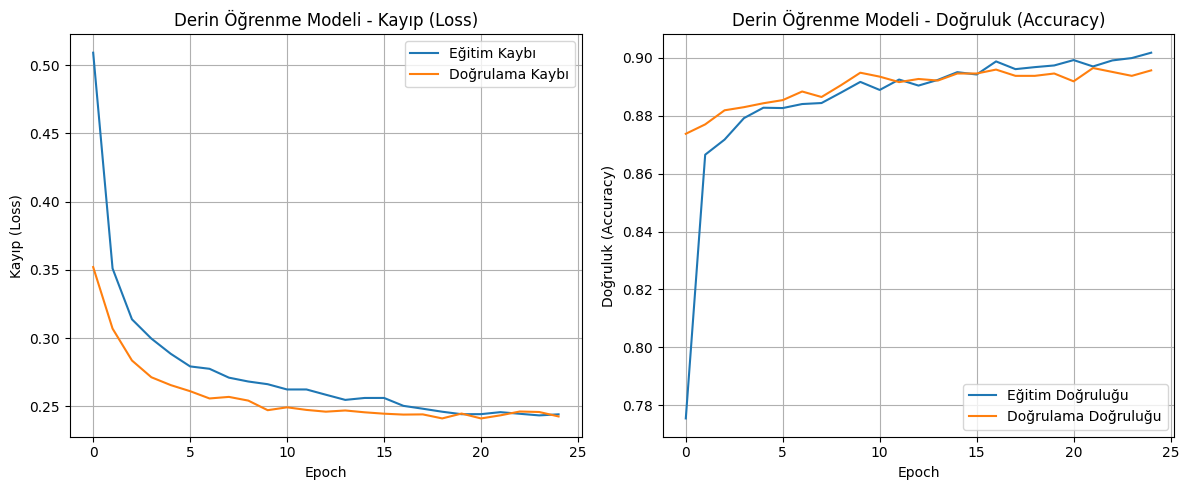

In [168]:
import matplotlib.pyplot as plt

# Enhanced Deep Learning Model için Loss grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_enhanced_2.history['loss'], label='Eğitim Kaybı')
plt.plot(history_enhanced_2.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Derin Öğrenme Modeli - Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.grid(True)

# Enhanced Deep Learning Model için Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(history_enhanced_2.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_enhanced_2.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Derin Öğrenme Modeli - Doğruluk (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## TabNet Modeli

Tabular veriler için tasarlanmış güçlü bir Derin Öğrenme modeli olan TabNetClassifier'ı tanımla ve eğitim verileri üzerinde eğit. Modelin performansını (Accuracy, Precision, Recall, F1-Score, ROC AUC) test seti üzerinde değerlendir ve 'results' sözlüğüne ekle.


In [169]:

# -----------------------------
# 1. TabNetClassifier tanımı
# -----------------------------
tabnet_model = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42,
    verbose=0
)

print("TabNetClassifier modeli başlatıldı.")

# -----------------------------
# 2. Model eğitimi
# -----------------------------
print("TabNet modeli eğitiliyor...")

tabnet_model.fit(
    X_train_scaled,
    y_train.values,
    eval_set=[(X_test_scaled, y_test.values)],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

print("TabNet modeli eğitildi.")

# -----------------------------
# 3. Tahminler
# -----------------------------
y_pred_tabnet = tabnet_model.predict(X_test_scaled)
y_pred_proba_tabnet = tabnet_model.predict_proba(X_test_scaled)[:, 1]

# -----------------------------
# 4. Metrikler
# -----------------------------
accuracy_tabnet = accuracy_score(y_test, y_pred_tabnet)
precision_tabnet = precision_score(y_test, y_pred_tabnet)
recall_tabnet = recall_score(y_test, y_pred_tabnet)
f1_tabnet = f1_score(y_test, y_pred_tabnet)
roc_auc_tabnet = roc_auc_score(y_test, y_pred_proba_tabnet)

# -----------------------------
# 5. Sonuçları kaydet
# -----------------------------
results["TabNet"] = {
    "Accuracy": accuracy_tabnet,
    "Precision": precision_tabnet,
    "Recall": recall_tabnet,
    "F1-Score": f1_tabnet,
    "ROC AUC": roc_auc_tabnet
}

# -----------------------------
# 6. Sonuçları yazdır
# -----------------------------
print("\n----- TabNet Performans Metrikleri -----")
print(f"Accuracy : {accuracy_tabnet:.4f}")
print(f"Precision: {precision_tabnet:.4f}")
print(f"Recall   : {recall_tabnet:.4f}")
print(f"F1-Score : {f1_tabnet:.4f}")
print(f"ROC AUC  : {roc_auc_tabnet:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tabnet))


TabNetClassifier modeli başlatıldı.
TabNet modeli eğitiliyor...

Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_auc = 0.91637


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet modeli eğitildi.

----- TabNet Performans Metrikleri -----
Accuracy : 0.8919
Precision: 0.6654
Recall   : 0.6049
F1-Score : 0.6337
ROC AUC  : 0.9164

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3127
           1       0.67      0.60      0.63       572

    accuracy                           0.89      3699
   macro avg       0.80      0.77      0.79      3699
weighted avg       0.89      0.89      0.89      3699



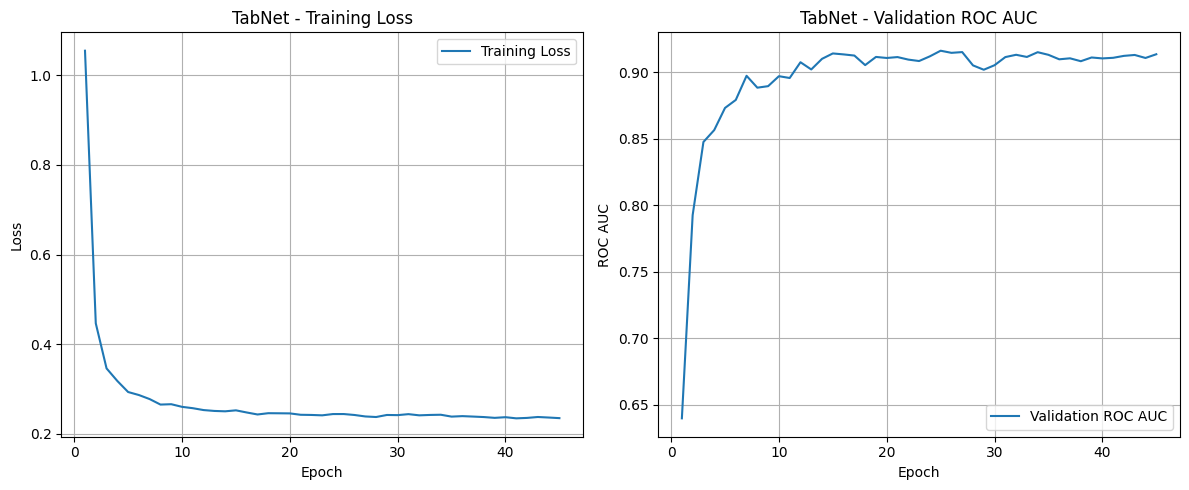

In [170]:
# -----------------------------
# TabNet Eğitim Geçmişi Grafikleri (DOĞRU)
# -----------------------------

if hasattr(tabnet_model, 'history') and hasattr(tabnet_model.history, 'history'):

    history = tabnet_model.history.history  # dict of lists

    # Epoch sayısı (loss listesinin uzunluğuna göre)
    epochs = range(1, len(history['loss']) + 1)

    train_losses = history['loss']

    # Validation AUC varsa al
    val_aucs = history.get('val_0_auc', None)

    plt.figure(figsize=(12, 5))

    # Loss Grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.title('TabNet - Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # ROC AUC Grafiği
    if val_aucs is not None:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, val_aucs, label='Validation ROC AUC')
        plt.title('TabNet - Validation ROC AUC')
        plt.xlabel('Epoch')
        plt.ylabel('ROC AUC')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

else:
    print("TabNet modeli için history verisi bulunamadı.")


## Tüm Model Sonuçlarını Güncelle ve Tekrar Görselleştir



Updated results DataFrame and melted metrics prepared.
                          Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression       0.878886   0.716783  0.358392  0.477855  0.897873
Decision Tree             0.850770   0.516722  0.540210  0.528205  0.723894
Random Forest             0.899162   0.736342  0.541958  0.624371  0.914532
SVM (RBF kernel)          0.841579   0.266667  0.013986  0.026578  0.769278
K-Nearest Neighbors       0.856718   0.571918  0.291958  0.386574  0.749896
Gradient Boosting         0.898081   0.706131  0.583916  0.639234  0.926460
XGBoost                   0.888889   0.670190  0.554196  0.606699  0.914317
LightGBM                  0.895647   0.693750  0.582168  0.633080  0.925472
CatBoost                  0.896729   0.706522  0.568182  0.629845  0.924543
Enhanced Deep Learning 2  0.895647   0.722488  0.527972  0.610101  0.745438
TabNet                    0.891863   0.665385  0.604895  0.633700  0.916368
                 Model    Metric 

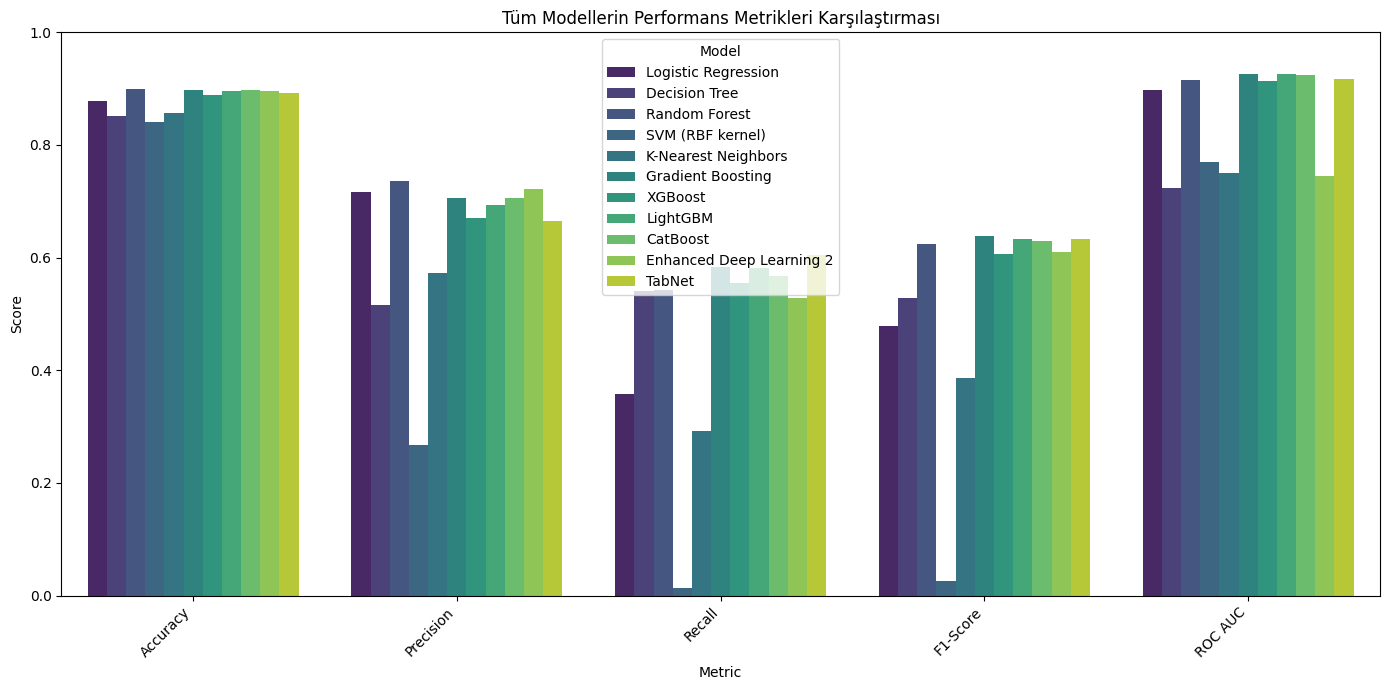

Tüm modellerin performans metrikleri karşılaştırması görselleştirildi.


In [171]:

# 'results' sözlüğünü DataFrame'e dönüştürün (şimdi tüm modelleri içeriyor)
results_df = pd.DataFrame(results).T

# Metrikleri model bazında karşılaştırmak için veriyi uzun formata dönüştürün
metrics_melted = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted.rename(columns={'index': 'Model'}, inplace=True)

print("Updated results DataFrame and melted metrics prepared.")
print(results_df)
print(metrics_melted.head())

# Metrikleri görselleştirin
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Tüm Modellerin Performans Metrikleri Karşılaştırması')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1) # Skorlar 0 ile 1 arasında olduğu için y ekseni limitini ayarlayın
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

print("Tüm modellerin performans metrikleri karşılaştırması görselleştirildi.")